Here we clean up the data into a format we can work with and build a first model based on some EDA/Intuition on features that are important

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, confusion_matrix

In [2]:
league_df = pd.read_csv('MatchTimelinesFirst15.csv')
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               48651 non-null  int64  
 1   matchId                  48651 non-null  float64
 2   blue_win                 48651 non-null  int64  
 3   blueGold                 48651 non-null  float64
 4   blueMinionsKilled        48651 non-null  float64
 5   blueJungleMinionsKilled  48651 non-null  float64
 6   blueAvgLevel             48651 non-null  float64
 7   redGold                  48651 non-null  float64
 8   redMinionsKilled         48651 non-null  float64
 9   redJungleMinionsKilled   48651 non-null  float64
 10  redAvgLevel              48651 non-null  float64
 11  blueChampKills           48651 non-null  float64
 12  blueHeraldKills          48651 non-null  float64
 13  blueDragonKills          48651 non-null  float64
 14  blueTowersDestroyed   

In [3]:
league_df['blueGold_Diff'] = league_df['blueGold'] - league_df['redGold']

In [4]:
league_df.head()

Unnamed: 0       matchId  blue_win  blueGold  blueMinionsKilled  \
0           0  3.493251e+09         0   24575.0              349.0   
1           1  3.464936e+09         0   27210.0              290.0   
2           2  3.428426e+09         1   32048.0              346.0   
3           3  3.428347e+09         0   20261.0              223.0   
4           4  3.428351e+09         1   30217.0              376.0   

   blueJungleMinionsKilled  blueAvgLevel  redGold  redMinionsKilled  \
0                     89.0           8.6  25856.0             346.0   
1                     36.0           9.0  28765.0             294.0   
2                     92.0           9.4  25305.0             293.0   
3                     60.0           8.2  30429.0             356.0   
4                    110.0           9.8  23889.0             334.0   

   redJungleMinionsKilled  redAvgLevel  blueChampKills  blueHeraldKills  \
0                    80.0          9.2             6.0              1.0   
1                    92.0          9.4            20.0              0.0   
2                    84.0          9.4            17.0              3.0   
3                   107.0          9.4             7.0              0.0   
4                    60.0          8.8            16.0              3.0   

   blueDragonKills  blueTowersDestroyed  redChampKills  redHeraldKills  \
0              0.0                  1.0           12.0             2.0   
1              0.0                  0.0           19.0             2.0   
2              0.0                  0.0           11.0             0.0   
3              0.0                  3.0           16.0             3.0   
4              0.0                  0.0            8.0             0.0   

   redDragonKills  redTowersDestroyed  blueGold_Diff  
0             0.0                 1.0        -1281.0  
1             0.0                 0.0        -1555.0  
2             0.0                 4.0         6743.0  
3             0.0                 0.0       -10168.0  
4             0.0                 2.0         6328.0

In [5]:
league_df = league_df.drop(columns=['Unnamed: 0', 'matchId']) # Dropping matchId since it's an identifier, not val

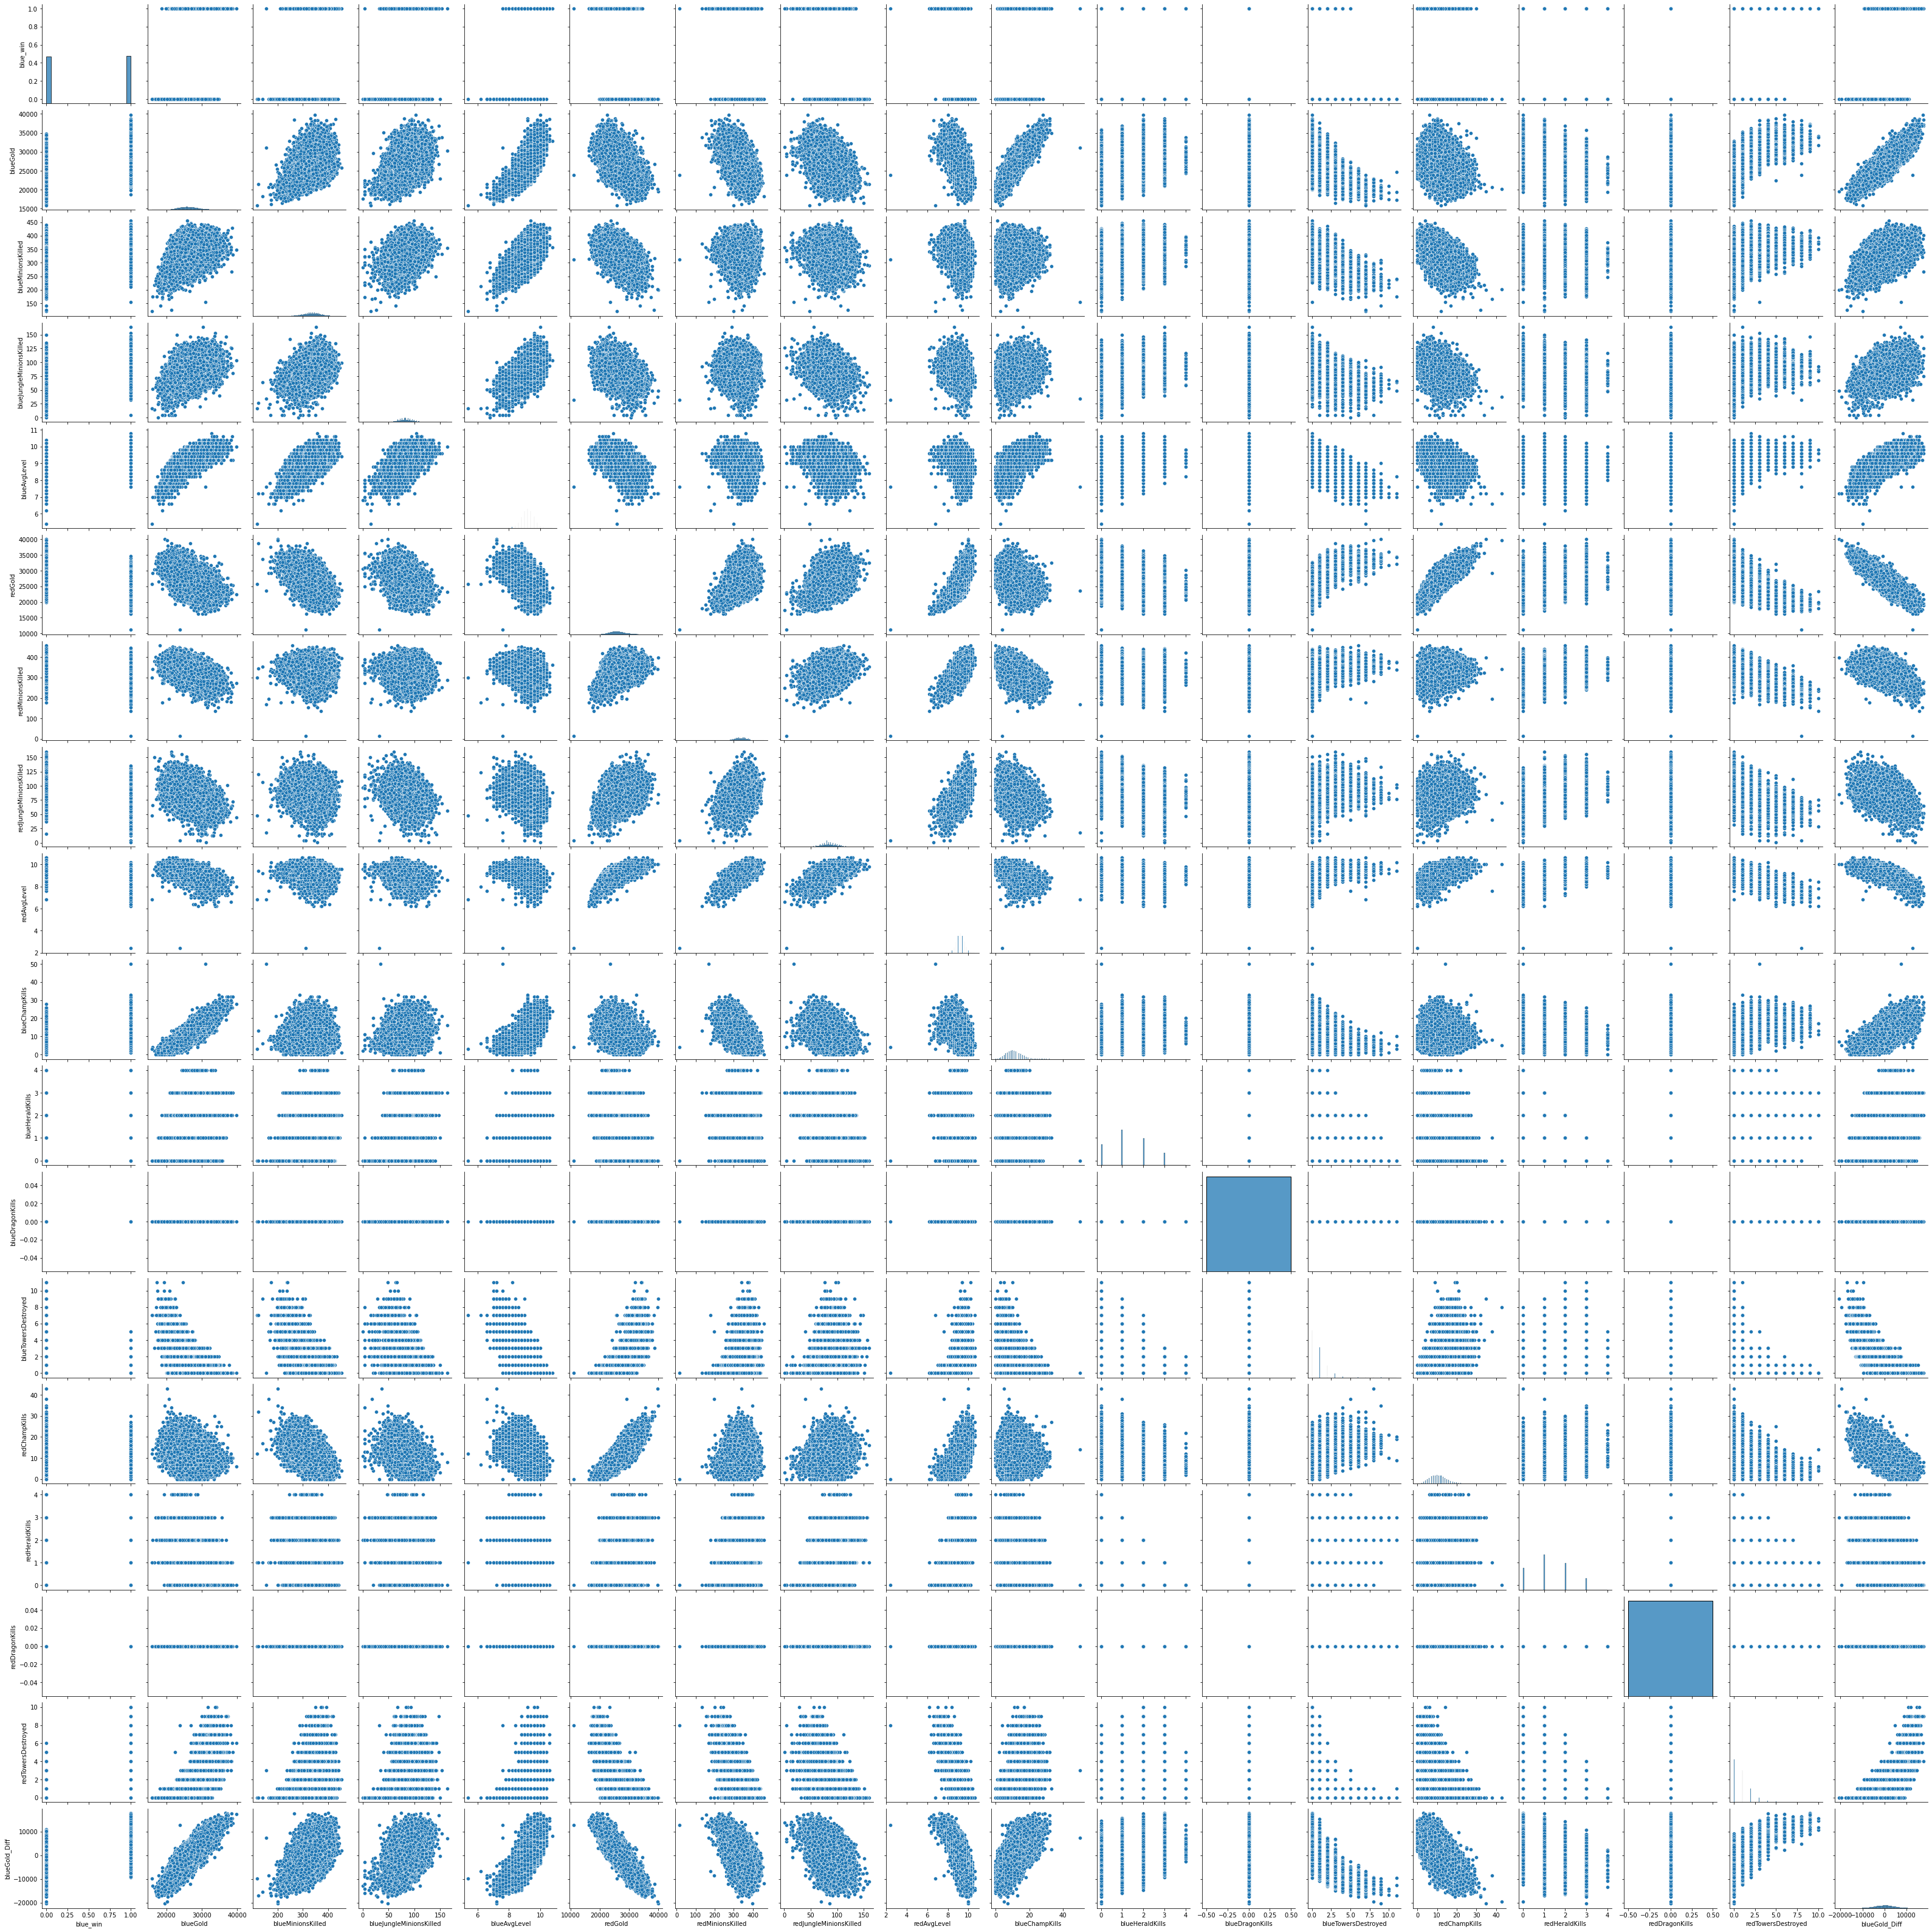

In [6]:
sns.pairplot(league_df)

In [7]:
league_df.redDragonKills.value_counts() # Weirdness in the pairplot on both dragon kills, seeing if there's anything
league_df.blueDragonKills.value_counts() # There's not, might as well drop them since it's not adding anything

0.0    48651
Name: blueDragonKills, dtype: int64

In [8]:
league_df = league_df.drop(columns = (['blueDragonKills', 'redDragonKills']))

In [9]:
league_df.head()

blue_win  blueGold  blueMinionsKilled  blueJungleMinionsKilled  \
0         0   24575.0              349.0                     89.0   
1         0   27210.0              290.0                     36.0   
2         1   32048.0              346.0                     92.0   
3         0   20261.0              223.0                     60.0   
4         1   30217.0              376.0                    110.0   

   blueAvgLevel  redGold  redMinionsKilled  redJungleMinionsKilled  \
0           8.6  25856.0             346.0                    80.0   
1           9.0  28765.0             294.0                    92.0   
2           9.4  25305.0             293.0                    84.0   
3           8.2  30429.0             356.0                   107.0   
4           9.8  23889.0             334.0                    60.0   

   redAvgLevel  blueChampKills  blueHeraldKills  blueTowersDestroyed  \
0          9.2             6.0              1.0                  1.0   
1          9.4            20.0              0.0                  0.0   
2          9.4            17.0              3.0                  0.0   
3          9.4             7.0              0.0                  3.0   
4          8.8            16.0              3.0                  0.0   

   redChampKills  redHeraldKills  redTowersDestroyed  blueGold_Diff  
0           12.0             2.0                 1.0        -1281.0  
1           19.0             2.0                 0.0        -1555.0  
2           11.0             0.0                 4.0         6743.0  
3           16.0             3.0                 0.0       -10168.0  
4            8.0             0.0                 2.0         6328.0

In [10]:
league_df['winner'] = league_df['blue_win'].apply(lambda x: 'Blue' if x == 1 else 'Red')

In [11]:
league_df.winner.value_counts()

Blue    24589
Red     24062
Name: winner, dtype: int64

In [12]:
league_df.head()

blue_win  blueGold  blueMinionsKilled  blueJungleMinionsKilled  \
0         0   24575.0              349.0                     89.0   
1         0   27210.0              290.0                     36.0   
2         1   32048.0              346.0                     92.0   
3         0   20261.0              223.0                     60.0   
4         1   30217.0              376.0                    110.0   

   blueAvgLevel  redGold  redMinionsKilled  redJungleMinionsKilled  \
0           8.6  25856.0             346.0                    80.0   
1           9.0  28765.0             294.0                    92.0   
2           9.4  25305.0             293.0                    84.0   
3           8.2  30429.0             356.0                   107.0   
4           9.8  23889.0             334.0                    60.0   

   redAvgLevel  blueChampKills  blueHeraldKills  blueTowersDestroyed  \
0          9.2             6.0              1.0                  1.0   
1          9.4            20.0              0.0                  0.0   
2          9.4            17.0              3.0                  0.0   
3          9.4             7.0              0.0                  3.0   
4          8.8            16.0              3.0                  0.0   

   redChampKills  redHeraldKills  redTowersDestroyed  blueGold_Diff winner  
0           12.0             2.0                 1.0        -1281.0    Red  
1           19.0             2.0                 0.0        -1555.0    Red  
2           11.0             0.0                 4.0         6743.0   Blue  
3           16.0             3.0                 0.0       -10168.0    Red  
4            8.0             0.0                 2.0         6328.0   Blue

In [13]:
X_train, X_test, y_train, y_test = train_test_split(league_df.iloc[:, 1:], league_df.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)

train_df = X_train.copy()
train_df['blue_win'] = y_train
train_df.head()

blueGold  blueMinionsKilled  blueJungleMinionsKilled  blueAvgLevel  \
42325   25406.0              276.0                     60.0           8.8   
40360   21942.0              297.0                     52.0           8.4   
12604   26454.0              324.0                     81.0           9.0   
14763   24204.0              348.0                     80.0           9.0   
46358   25284.0              306.0                     71.0           9.2   

       redGold  redMinionsKilled  redJungleMinionsKilled  redAvgLevel  \
42325  28670.0             341.0                    96.0          9.6   
40360  30225.0             377.0                    99.0          9.6   
12604  27410.0             309.0                    88.0          9.4   
14763  25954.0             337.0                    86.0          9.6   
46358  28949.0             388.0                    95.0          9.2   

       blueChampKills  blueHeraldKills  blueTowersDestroyed  redChampKills  \
42325            15.0              1.0                  2.0           14.0   
40360             7.0              1.0                  4.0           12.0   
12604            11.0              1.0                  0.0           16.0   
14763             8.0              1.0                  0.0           10.0   
46358            14.0              0.0                  2.0           11.0   

       redHeraldKills  redTowersDestroyed  blueGold_Diff winner  blue_win  
42325             2.0                 0.0        -3264.0   Blue         1  
40360             2.0                 0.0        -8283.0    Red         0  
12604             2.0                 0.0         -956.0    Red         0  
14763             1.0                 0.0        -1750.0    Red         0  
46358             2.0                 0.0        -3665.0    Red         0

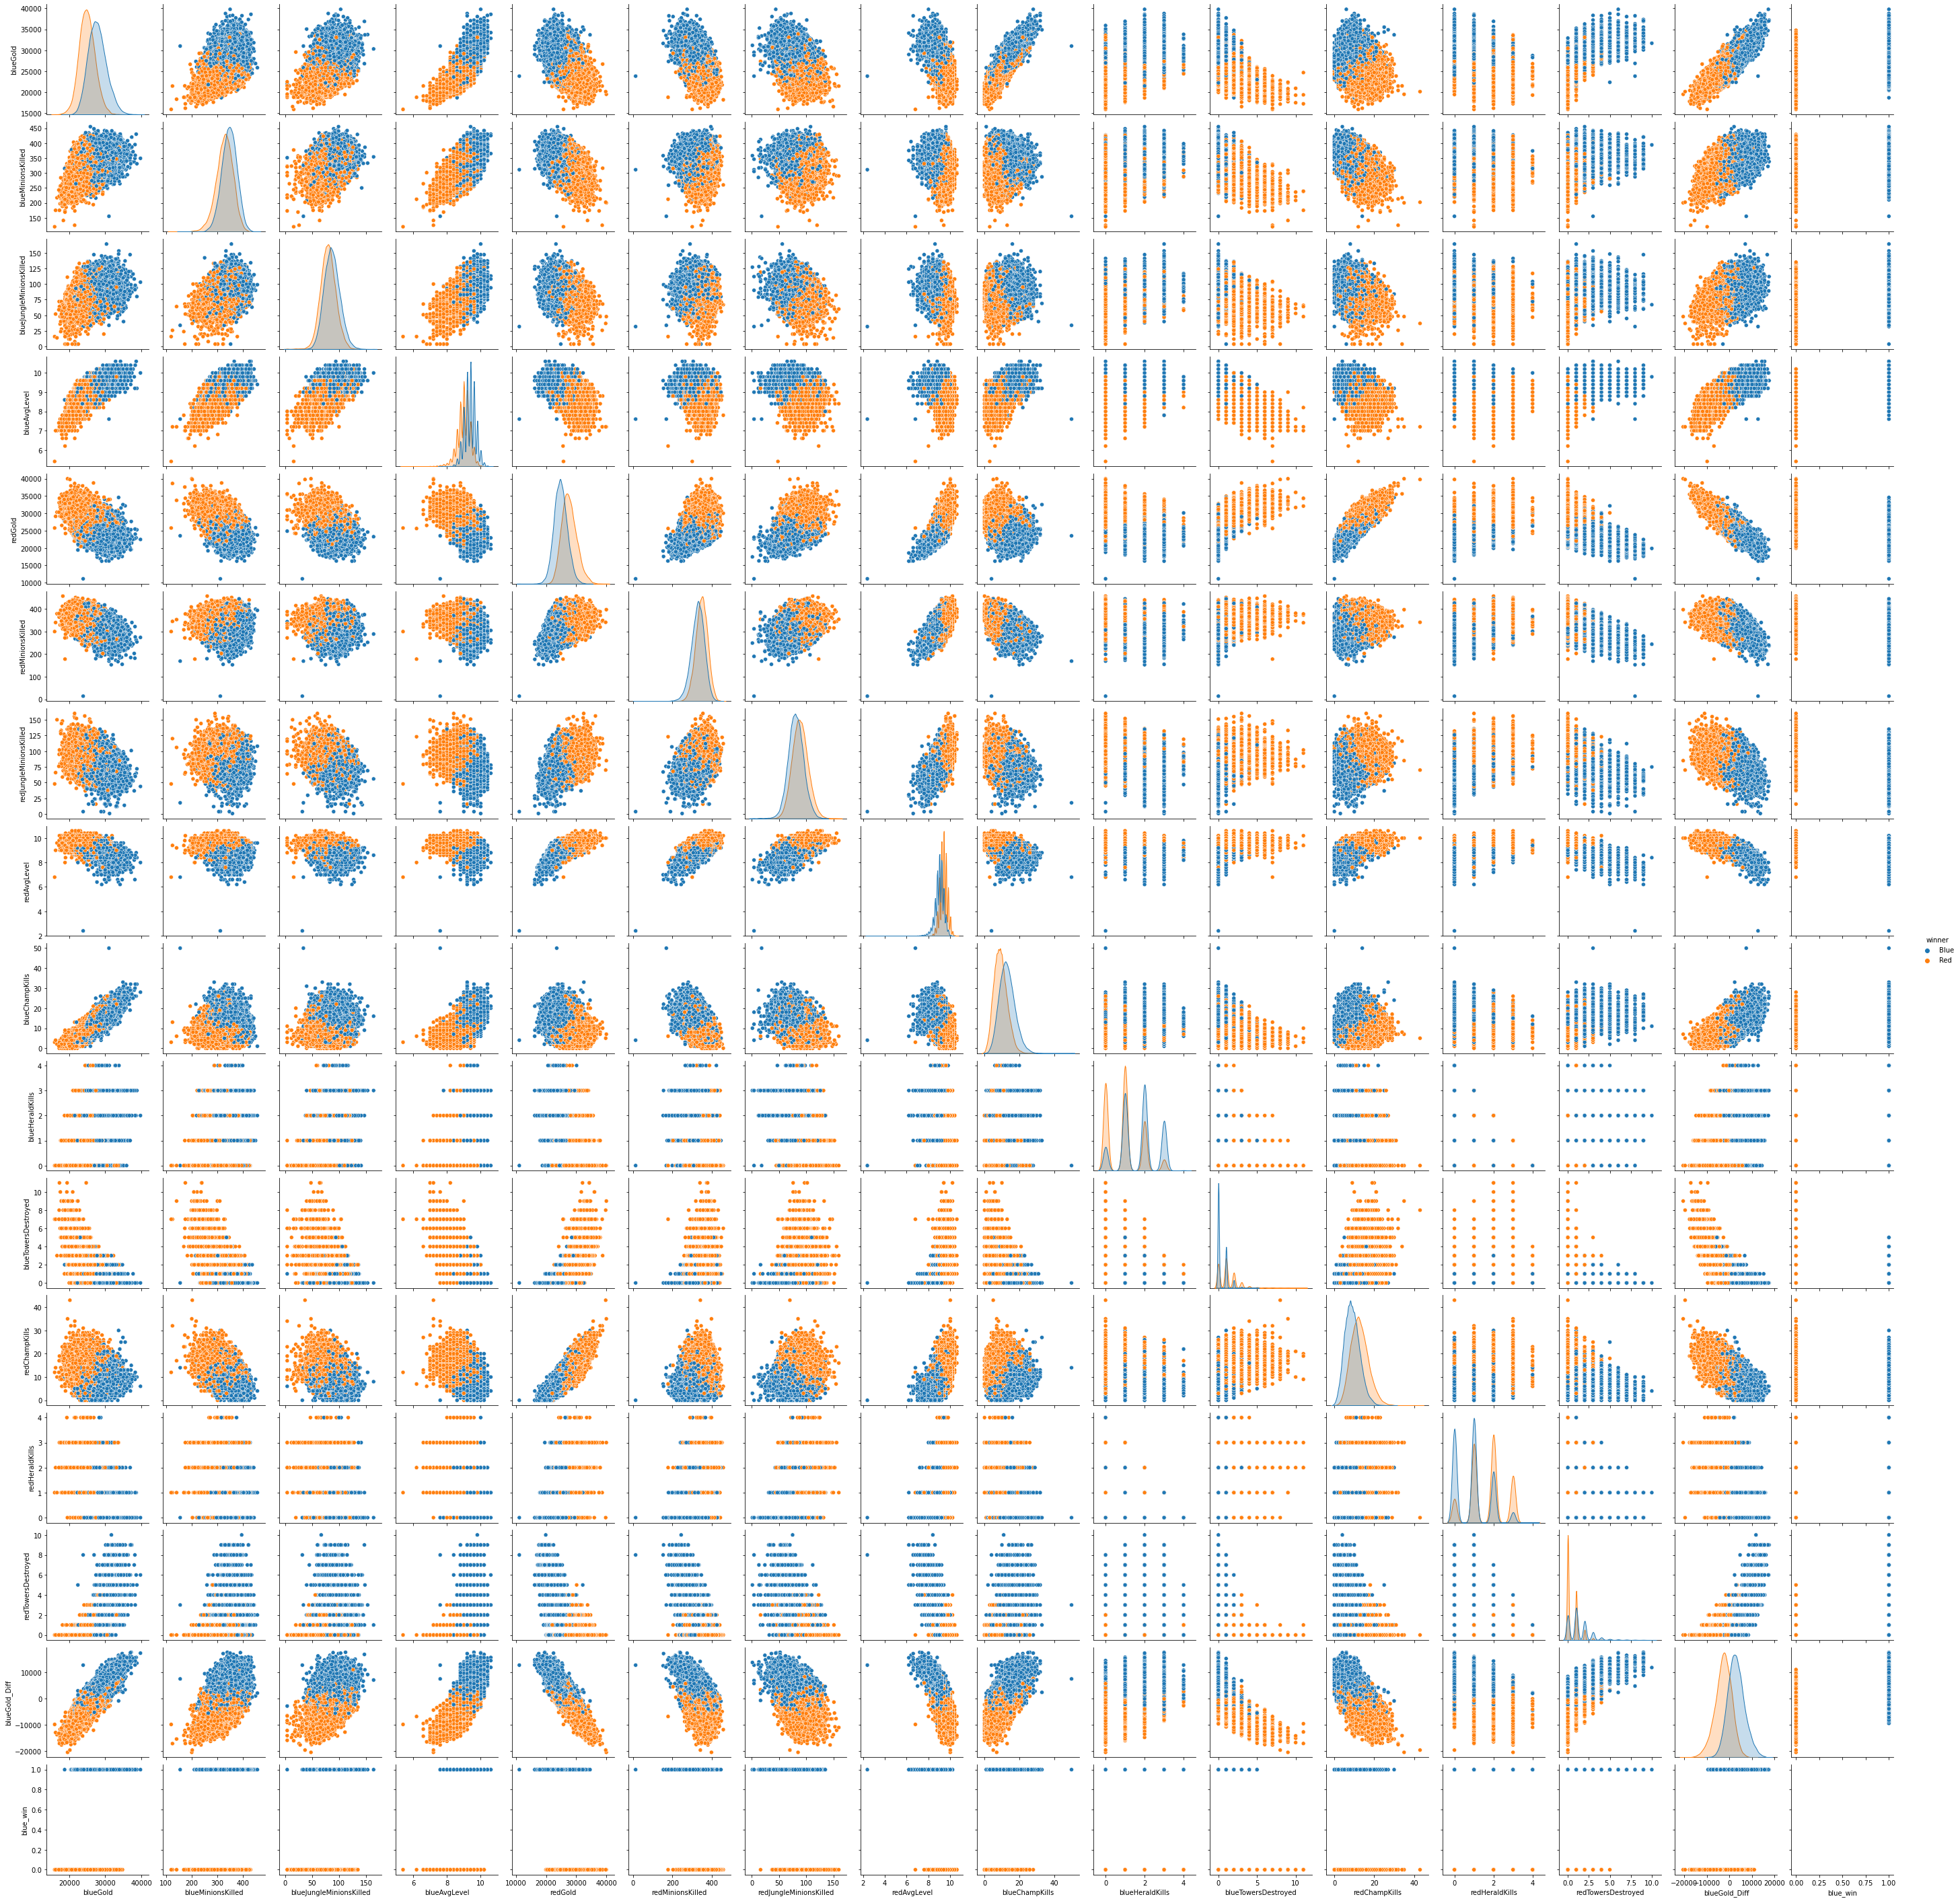

In [14]:
sns.pairplot(train_df, hue='winner')

In [15]:
small_xtrain, small_xtest, small_ytrain, small_ytest = train_test_split(league_df[['blueGold', 'blueMinionsKilled',
                                                                                   'blueChampKills', 'blueTowersDestroyed',
                                                                                   'blueGold_Diff']], league_df['blue_win'],
                                                                        test_size = .2, random_state=42)

We're gonna test on some blue team only features since they're our target and focusing on their improvement more. The score to hold against is f1 as we want to be sure our model is properly predicting and that we can balance against factors that we do not have data for (team composition, what champions have the most kills, what lane, etc.)

In [16]:
smaller_xtrain, smaller_xtest, smaller_ytrain, smaller_ytest = train_test_split(small_xtrain, small_ytrain,
                                                                                test_size=.25, random_state=42)

In [17]:
log_reg = LogisticRegression(C=100)
log_reg.fit(smaller_xtrain, smaller_ytrain)

LogisticRegression(C=100)

In [18]:
f1_score(smaller_ytrain, log_reg.predict(smaller_xtrain))

0.78062231905767

In [19]:
f1_score(smaller_ytest, log_reg.predict(smaller_xtest))

0.7726161369193155

In [20]:
confusion_matrix(smaller_ytest, log_reg.predict(smaller_xtest))

array([[3706, 1086],
       [1146, 3792]])

In [21]:
log_reg.fit(small_xtrain, small_ytrain)

LogisticRegression(C=100)

In [22]:
f1_score(small_ytrain, log_reg.predict(small_xtrain))

0.7791962897841653

In [23]:
f1_score(small_ytest, log_reg.predict(small_xtest))

0.7865939834443771

In [24]:
blue_confuse = confusion_matrix(small_ytest, log_reg.predict(small_xtest))

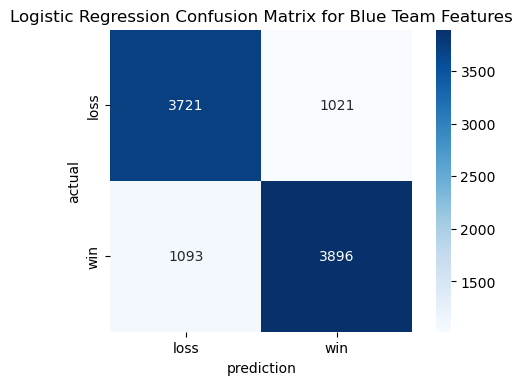

In [25]:
plt.figure(dpi=100);
sns.heatmap(blue_confuse, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['loss', 'win'],
           yticklabels=['loss', 'win']);
plt.xlabel('prediction');
plt.ylabel('actual');
plt.title('Logistic Regression Confusion Matrix for Blue Team Features')
plt.savefig('figures/Blue_team_confusion_matrix.svg', bbox_inches = 'tight')

In [26]:
league_df['blueChamp_Kills_Diff'] = league_df['blueChampKills'] - league_df['redChampKills']

In [27]:
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueGold                 48651 non-null  float64
 2   blueMinionsKilled        48651 non-null  float64
 3   blueJungleMinionsKilled  48651 non-null  float64
 4   blueAvgLevel             48651 non-null  float64
 5   redGold                  48651 non-null  float64
 6   redMinionsKilled         48651 non-null  float64
 7   redJungleMinionsKilled   48651 non-null  float64
 8   redAvgLevel              48651 non-null  float64
 9   blueChampKills           48651 non-null  float64
 10  blueHeraldKills          48651 non-null  float64
 11  blueTowersDestroyed      48651 non-null  float64
 12  redChampKills            48651 non-null  float64
 13  redHeraldKills           48651 non-null  float64
 14  redTowersDestroyed    

In [28]:
league_df.to_csv('league_cleaned.csv', header=['blue_win', 'blueGold', 'blueMinionsKilled',
                                               'blueJungleMin', 'blueAvgLevel', 'redGold',
                                               'redMinionsKilled', 'redJungleMinionsKilled', 'redAvgLevel',
                                               'blueChampKills', 'blueHeraldKills', 'blueTowersDestroyed', 
                                               'redChampKills', 'redHeraldKills', 'redTowersDestroyed',
                                               'blueGold_Diff', 'winner', 'blueChamp_Kills_Diff'], index=False)